<a href="https://colab.research.google.com/github/LladserRG/appm-4565-5565-random-graphs/blob/main/Demos/Binary_Trees_Boltzman_Sampler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

In [ ]:
def binary_tree_sampler(z):
    # Boltzmann choice: Leaf (1/T(z)) or Node (z*T(z))
    tz = (1 - math.sqrt(1 - 4 * z)) / (2 * z)
    if random.random() < (1 / tz):
        return None
    return (binary_tree_sampler(z), binary_tree_sampler(z))

# Your Input Data
z = 0.2491349481
tree_data = binary_tree_sampler(z)
Esize = round((math.sqrt(1 - 4*z) + 2*z - 1) / ((math.sqrt(1 - 4*z)-1)*math.sqrt(1 - 4*z)),2)

print("Tree: " + str(tree_data))

text = str(tree_data)
size = 1+text.count('(')+text.count(')')
print("Expected Size: " + str(Esize))
print("Actual # of nodes: " + str(size) + ", including: " + str(text.count('(')) + " internal nodes")

Tree: ((((((None, ((None, ((None, (None, (None, None))), None)), None)), (None, None)), None), (None, (None, None))), ((None, ((((None, None), (None, ((None, None), (None, (((None, None), (((None, ((None, ((None, ((((None, (None, None)), (None, ((None, ((None, None), None)), None))), (None, ((None, None), None))), (None, (None, (None, None))))), None)), None)), ((((None, None), (((None, None), None), None)), None), None)), ((((None, ((None, ((((None, None), (None, (None, (None, (((((None, ((None, None), (None, (None, (None, None))))), None), None), None), (None, None)))))), (((None, (None, ((None, (None, ((None, None), None))), (None, (None, None))))), ((None, (None, None)), None)), ((None, None), ((((None, None), ((None, None), (None, None))), None), ((((None, None), None), None), (((None, None), None), None)))))), None)), (None, None))), None), (None, (None, None))), (((None, None), None), ((None, None), None))))), None))))), None), None)), None)), None)
Expected Size: 8.0
Actual # o

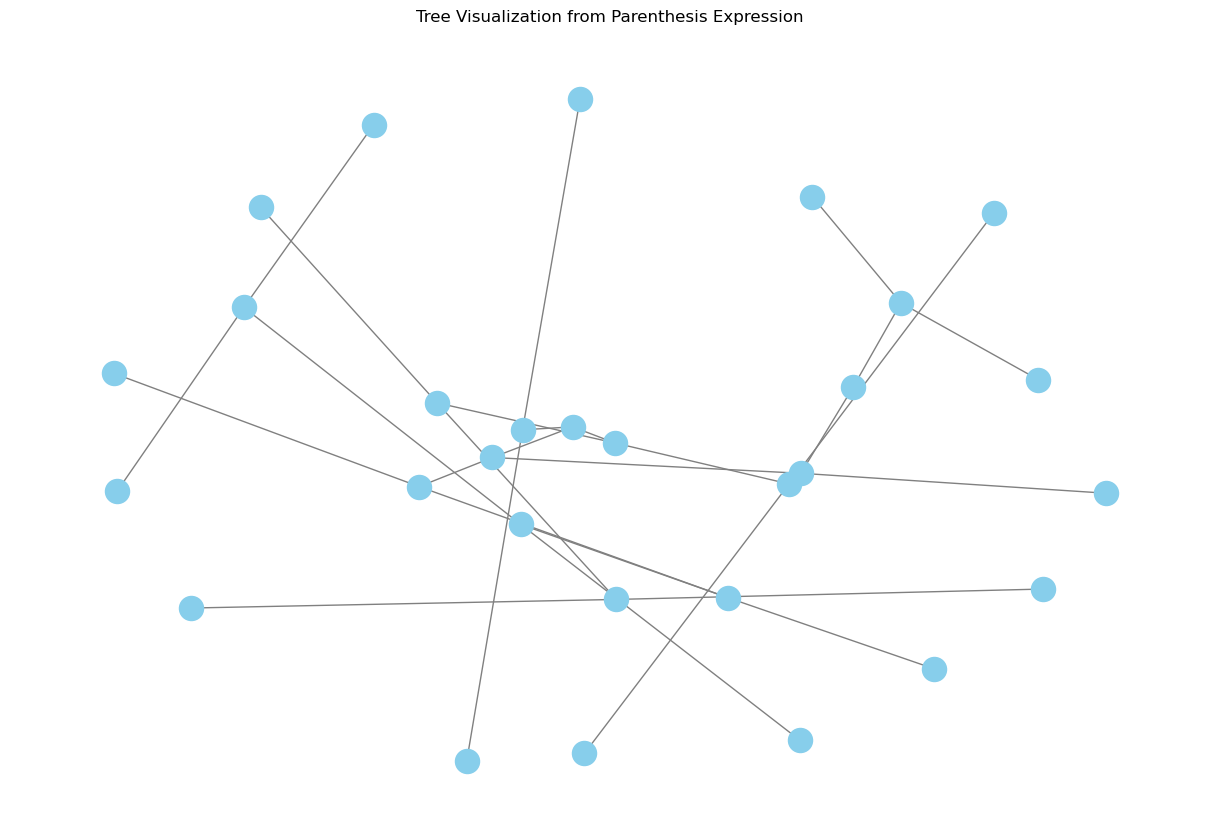

In [ ]:
def build_tree_graph(structure, G=None, parent=None, node_id=0):
    """
    Recursively parses the nested tuple structure and adds nodes/edges to a NetworkX graph.
    """
    if G is None:
        G = nx.DiGraph()

    # Assign a unique identifier to the current node
    current_node = node_id
    G.add_node(current_node, label="None" if structure is None else "Node")

    if parent is not None:
        G.add_edge(parent, current_node)

    # Track the next available ID
    next_id = node_id + 1

    # If the structure is a tuple, it has children (left, right)
    if isinstance(structure, tuple):
        for child in structure:
            _, next_id = build_tree_graph(child, G, current_node, next_id)

    return G, next_id

def draw_tree(structure):
    # 1. Build the graph
    G, _ = build_tree_graph(structure)

    # 2. Define the layout (Hierarchy)
    # Note: For a true tree look, we use a custom recursive positioning or
    # the 'dot' layout if Graphviz is installed. Here is a simple layout:
    pos = nx.spring_layout(G) # Basic layout

    # 3. Plotting
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=False, node_color="skyblue", edge_color="gray", arrows=False)
    plt.title("Tree Visualization from Parenthesis Expression")
    plt.show()

# Execute
draw_tree(tree_data)



In [ ]:
from pyvis.network import Network
import networkx as nx

# 1. Recursive function to build the graph from your tuple expression
def build_nx_graph(structure, G=None, parent=None, node_id=0):
    if G is None: G = nx.Graph()
    current_node = node_id
    G.add_node(current_node)
    if parent is not None: G.add_edge(parent, current_node)
    next_id = node_id + 1

    if isinstance(structure, tuple):
        for child in structure:
            G, next_id = build_nx_graph(child, G, current_node, next_id)
    return G, next_id

# Your complex input data
#tree_data = ((None, ((((((None, None), (None, ((((((None, None), (None, None)), None), ((None, None), None)), ((None, None), (None, None))), ((None, None), (None, None))))), (None, ((None, (None, None)), None))), (None, ((None, None), None))), None), (None, None))), None)

G, _ = build_nx_graph(tree_data)

# Apply coloring logic (Red for root, Blue for branches, Green for leaves)
for node in G.nodes():
    if node == 0:
        G.nodes[node]['color'] = '#FF0000' # Hex for Red
        G.nodes[node]['size'] = 25
    elif G.degree(node) == 1:
        G.nodes[node]['color'] = '#00FF00' # Hex for Green
        G.nodes[node]['size'] = 12
    else:
        G.nodes[node]['color'] = '#1E90FF' # Blue
        G.nodes[node]['size'] = 18

# 2. Setup the Network with high-performance settings
net = Network(height="700px", width="100%", notebook=True, cdn_resources='in_line', bgcolor="#ffffff")

# 3. Increase spacing via Physics Options
# We increase gravitationalConstant (more negative = more push)
# and springLength (longer connections)
net.from_nx(G)
net.set_options("""
var options = {
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -250,
      "centralGravity": 0.001,
      "springLength": 120,
      "springConstant": 0.01,
      "damping": 0.4,
      "avoidOverlap": 1
    },
    "solver": "forceAtlas2Based",
    "timestep": 0.25,
    "stabilization": { "iterations": 200 }
  }
}
""")

# 4. Show the interactive fluid output
net.show("spaced_fluid_tree.html")

spaced_fluid_tree.html


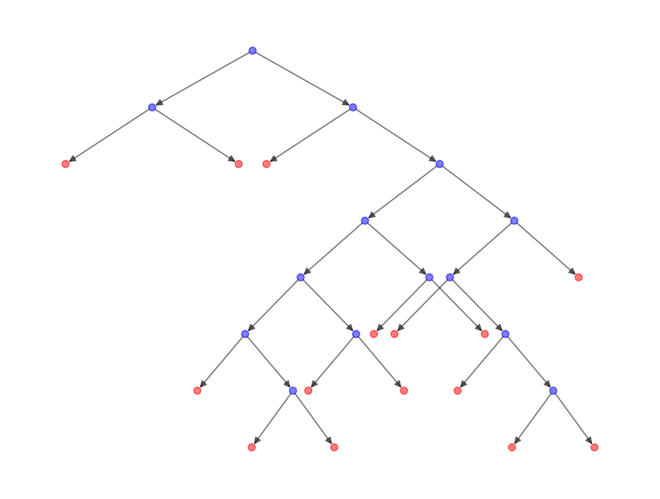

In [ ]:
def build_tree(structure, G=None, parent=None, node_id=0, pos=None, x=0, y=0, layer_width=1.0):
    if G is None:
        G = nx.DiGraph()
        pos = {}

    current_node = node_id
    G.add_node(current_node)
    pos[current_node] = (x, y)

    if parent is not None:
        G.add_edge(parent, current_node)

    next_id = node_id + 1

    if isinstance(structure, tuple):
        # We must unpack all 3 values (G, next_id, pos) to avoid the ValueError
        # Recurse Left
        G, next_id, pos = build_tree(structure[0], G, current_node, next_id, pos,
                                     x - layer_width, y - 1, layer_width / 1.16)

        # Recurse Right
        G, next_id, pos = build_tree(structure[1], G, current_node, next_id, pos,
                                     x + layer_width, y - 1, layer_width / 1.16)

    return G, next_id, pos

# Execute - Now the 3 values returned match the 3 variables on the left
G, last_id, pos = build_tree(tree_data)

# Increase layer_width to 5.0 or 10.0 for more horizontal spread
G, last_id, pos = build_tree(tree_data, layer_width=10.0)

# Create a color map: teal for nodes with children, orange for 'None' leaves
node_colors = []
for node in G.nodes():
    # If a node has no outgoing edges, it's a leaf
    if G.out_degree(node) == 0:
        node_colors.append("red")
    else:
        node_colors.append("blue")

nx.draw(G, pos, node_color=node_colors, node_size=25, alpha=.5)

In [ ]:
# 1. Build the tree structure
def build_nx_graph(structure, G=None, parent=None, node_id=0):
    if G is None: G = nx.Graph()
    current_node = node_id
    G.add_node(current_node)
    if parent is not None: G.add_edge(parent, current_node)
    next_id = node_id + 1
    if isinstance(structure, tuple):
        for child in structure:
            G, next_id = build_nx_graph(child, G, current_node, next_id)
    return G, next_id

#tree_data = (None, ((None, None), ((((((((None, None), None), None), None), (None, None)), (None, None)), ((None, None), (None, (None, None)))), (None, None))))
G, _ = build_nx_graph(tree_data)

# --- COLORING LOGIC ---
for node in G.nodes():
    # Identify leaves: degree of 1 and not the very first node (root)
    if G.degree(node) == 1 and node != 0:
        G.nodes[node]['color'] = '#DC143C' # Bright Orange for leaves
        G.nodes[node]['size'] = 30
    elif node == 0:
        G.nodes[node]['color'] = '#228B22' # Forest green for the Root
        G.nodes[node]['size'] = 30
    else:
        G.nodes[node]['color'] = '#1E90FF' # Dodger Blue for branches
        G.nodes[node]['size'] = 30

# 2. Create Pyvis Network (Note the underscore in 'in_line')
net = Network(height="600px", width="100%", notebook=True, cdn_resources='in_line', bgcolor="#ffffff", font_color="black")

# 3. Load and Set Physics
net.from_nx(G)

net.set_options("""
var options = {
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -100,
      "centralGravity": 0.005,
      "springLength": 80,
      "springConstant": 0.02,
      "damping": 0.4
    },
    "solver": "forceAtlas2Based",
    "timestep": 0.25
  },
  "interaction": {
    "hover": true,
    "dragNodes": true
  }
}
""")

# 4. Display
net.show("fluid_tree_colored.html")

fluid_tree_colored.html
